In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:

url='/content/drive/MyDrive/Airquality_index.csv'
df=pd.read_csv(url)

In [ ]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [ ]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [ ]:
df.isna().sum()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,1


<Axes: >

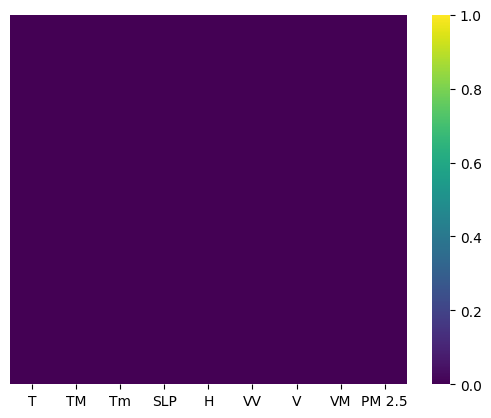

In [ ]:
#Ploting null values heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [ ]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [ ]:
df=df.dropna(axis=0)

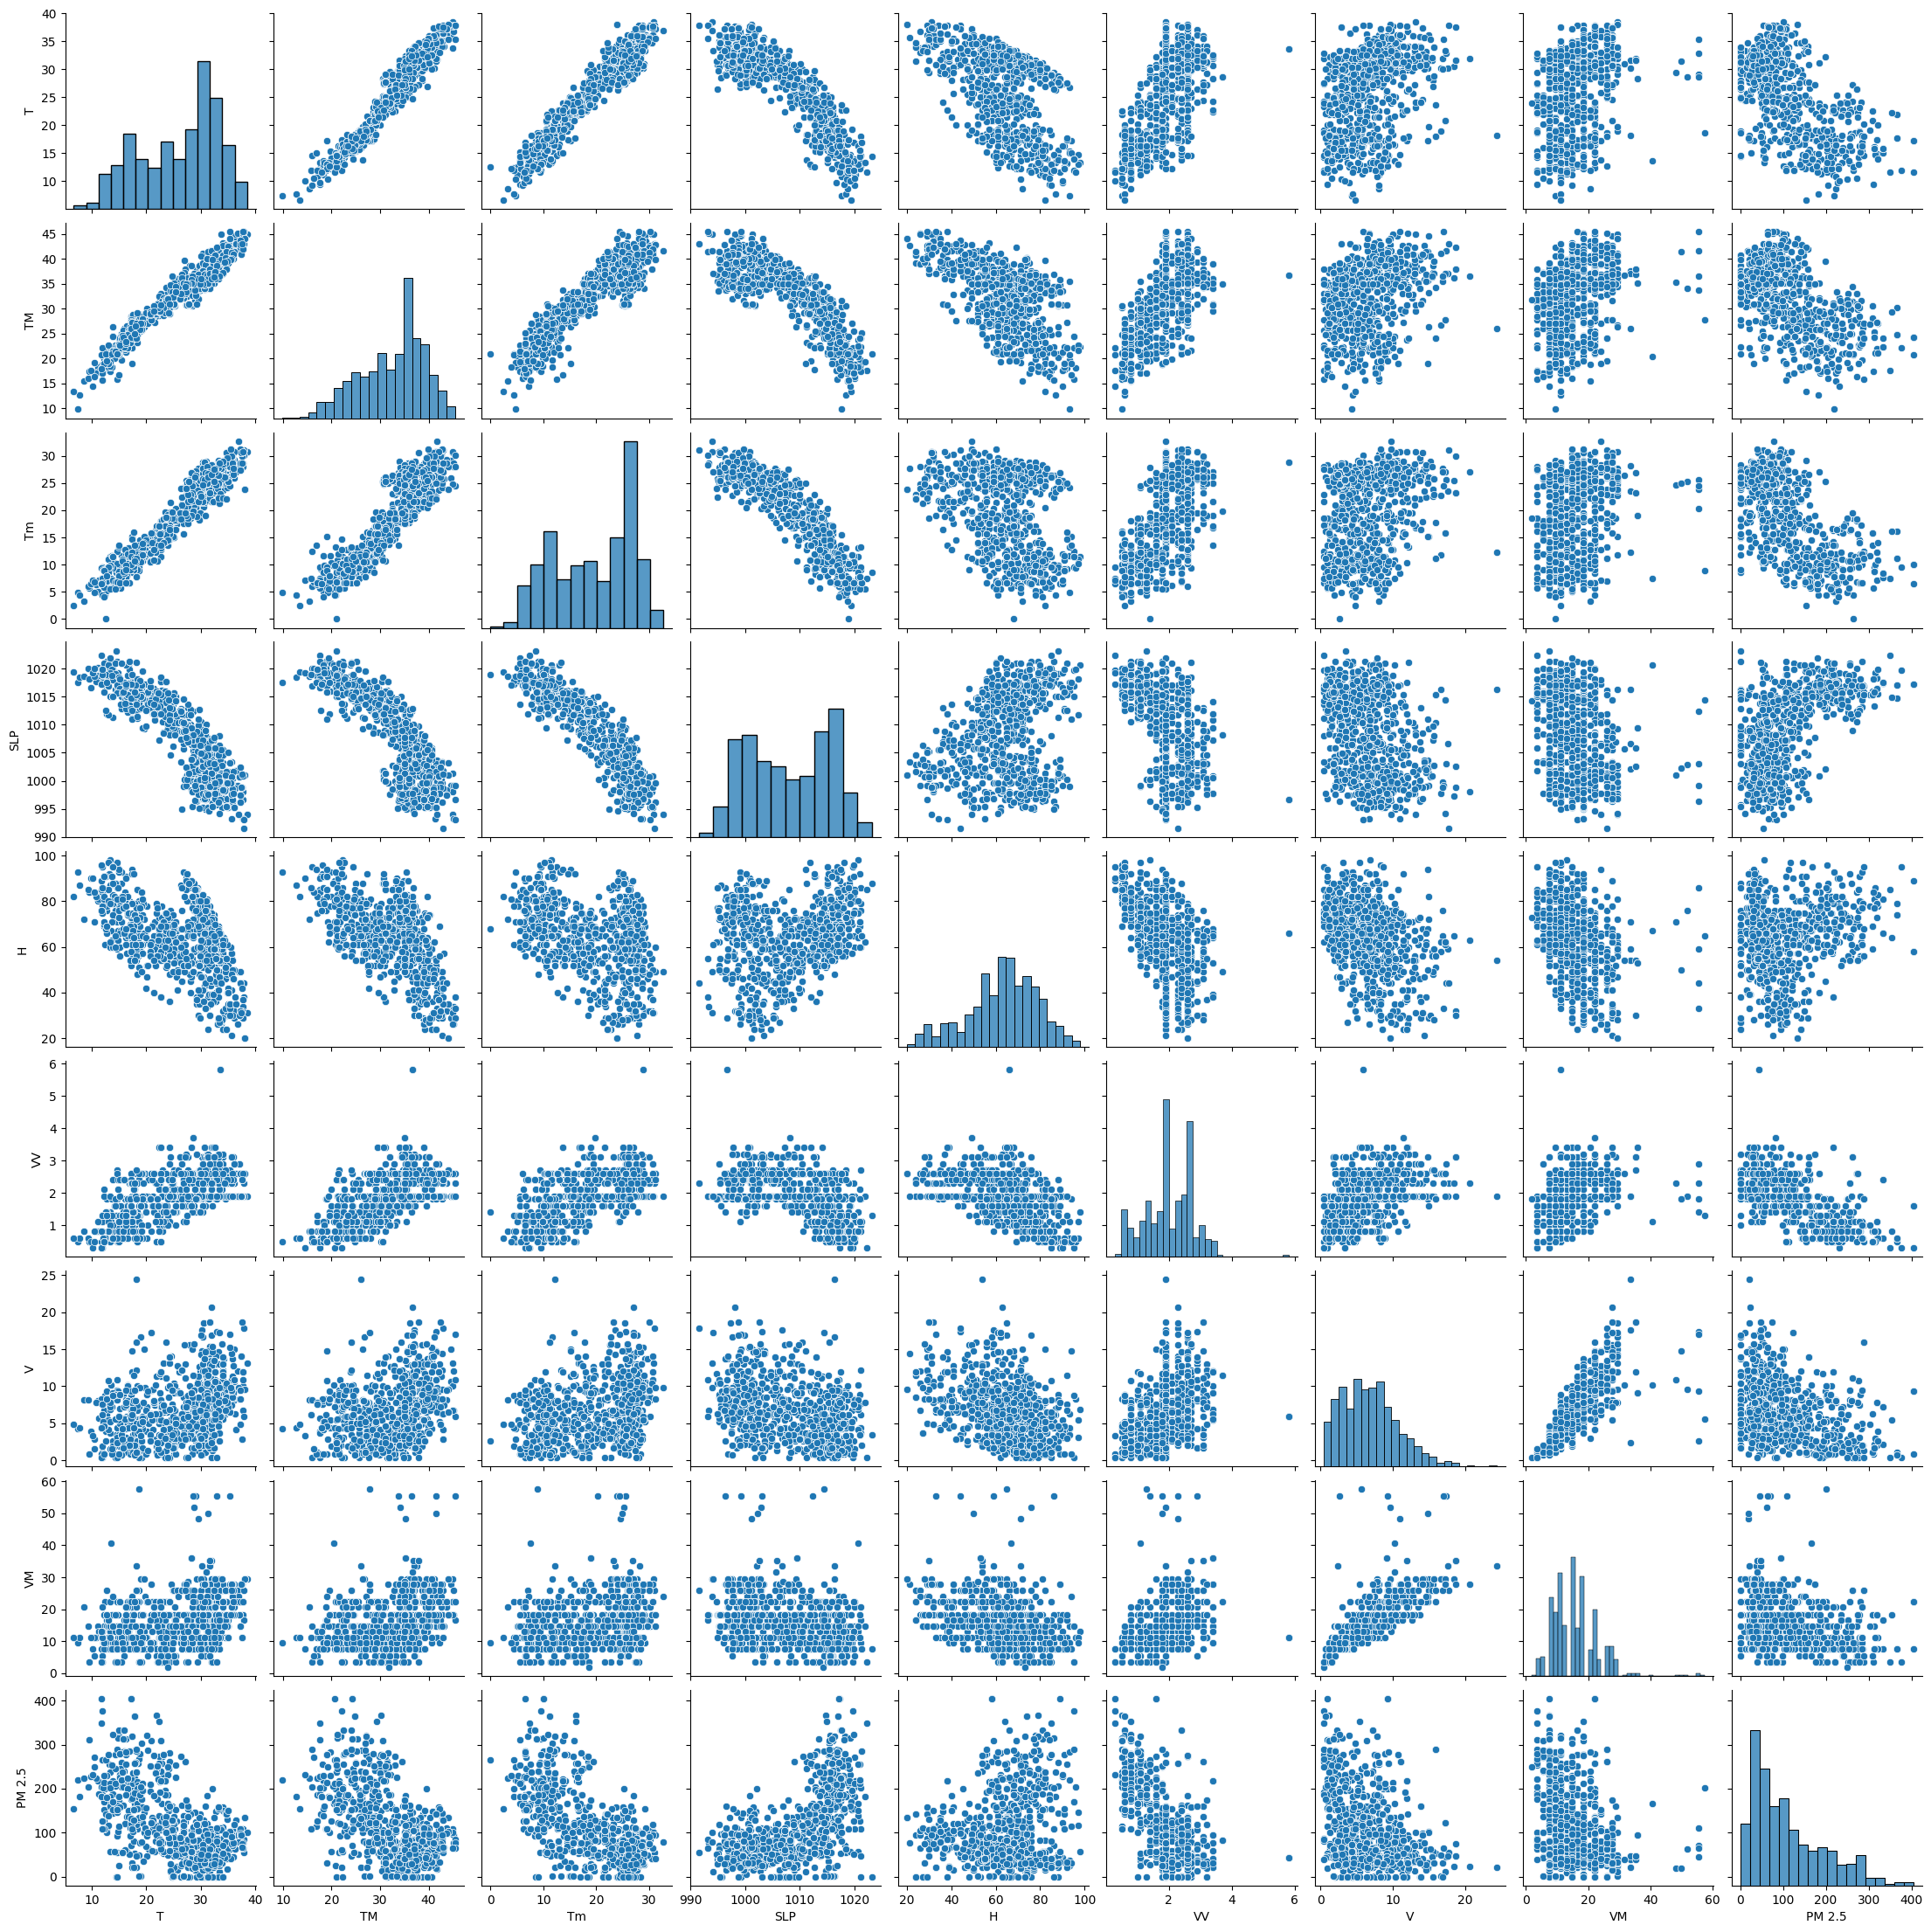

In [ ]:
sns.pairplot(df)

In [ ]:
# fit a OLS model

import statsmodels.api as sm
model= sm.OLS(df.iloc[:,-1], sm.add_constant(df.iloc[:,:-1])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 PM 2.5   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     155.1
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          1.26e-173
Time:                        02:13:09   Log-Likelihood:                -5976.7
No. Observations:                1092   AIC:                         1.197e+04
Df Residuals:                    1083   BIC:                         1.202e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.4955    651.919      0.478      0.6

In [ ]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


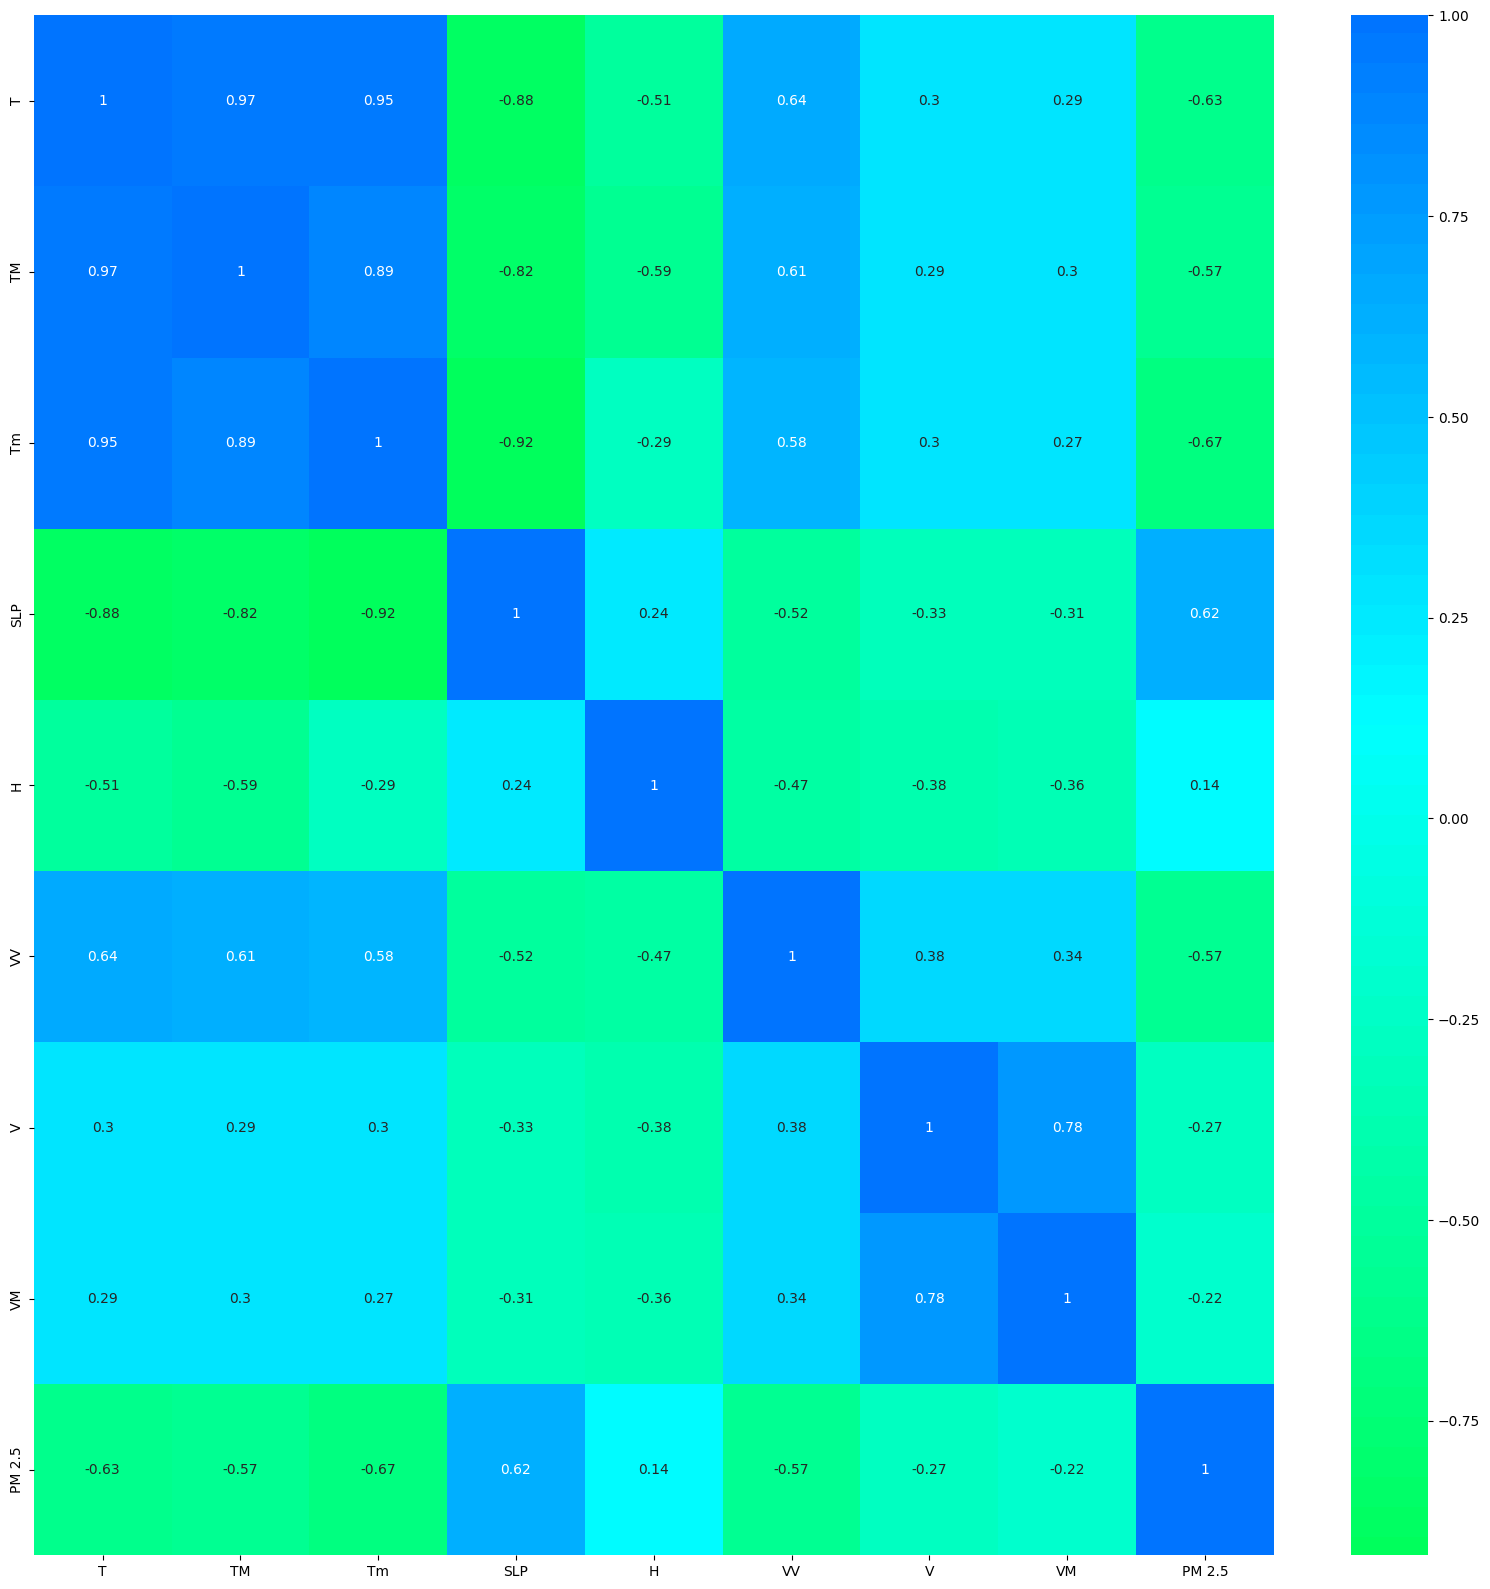

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from matplotlib import cm
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
hsv_modified = cm.get_cmap('hsv',256)
newcmp = ListedColormap(hsv_modified(np.linspace(0.4, 0.6, 256)))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap=newcmp)

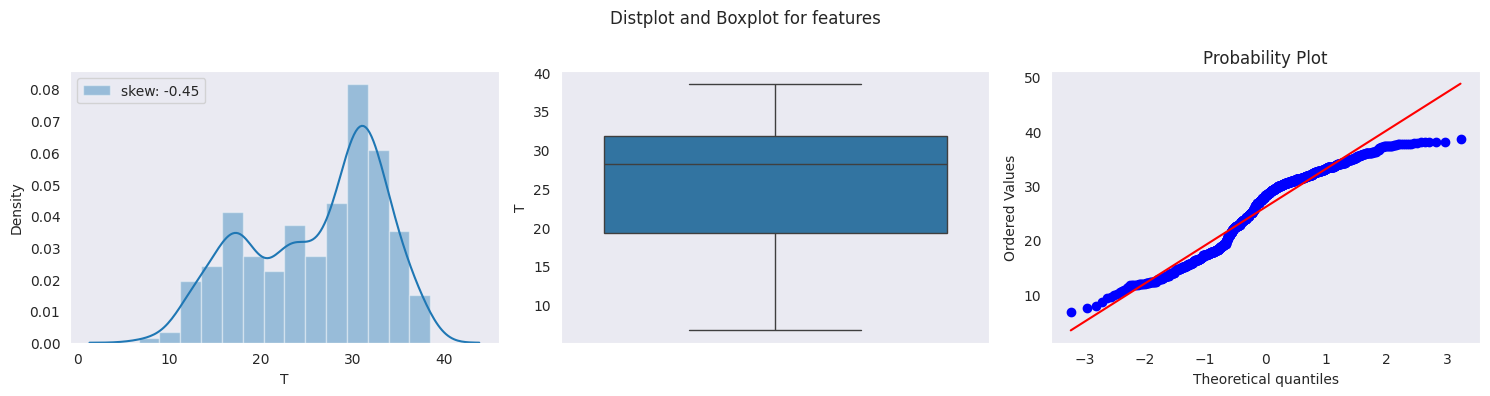

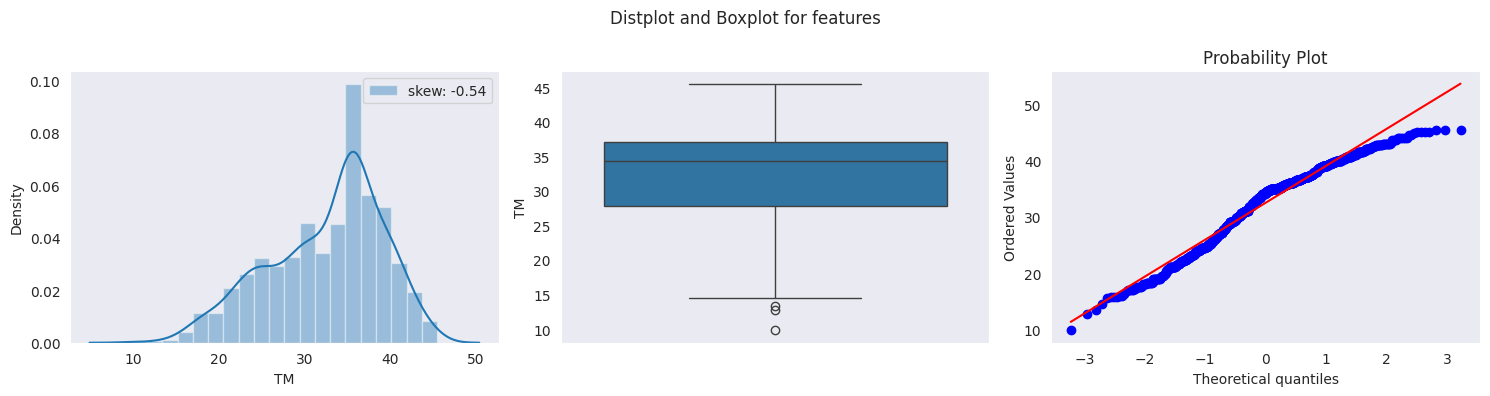

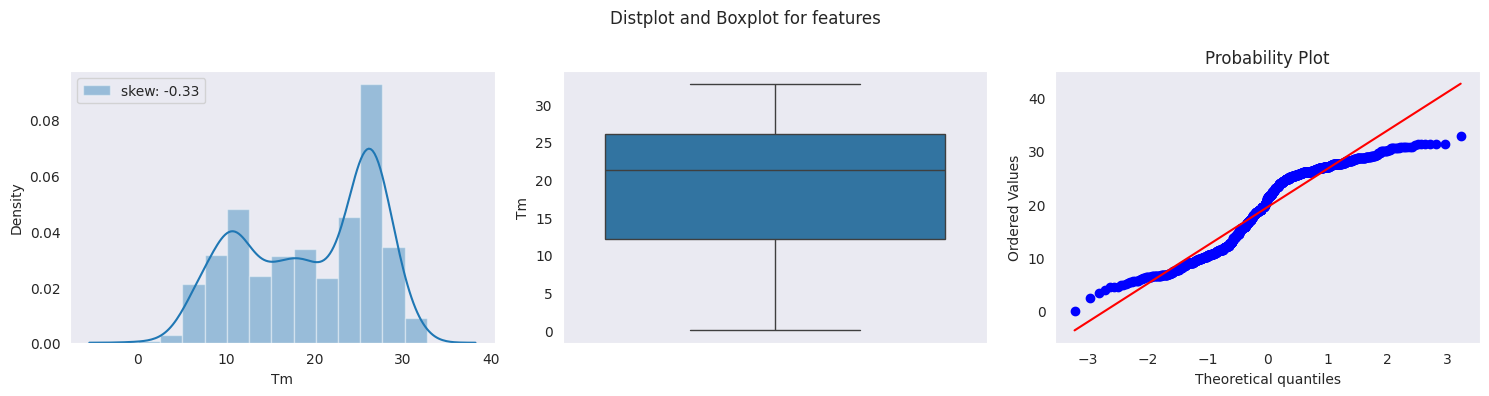

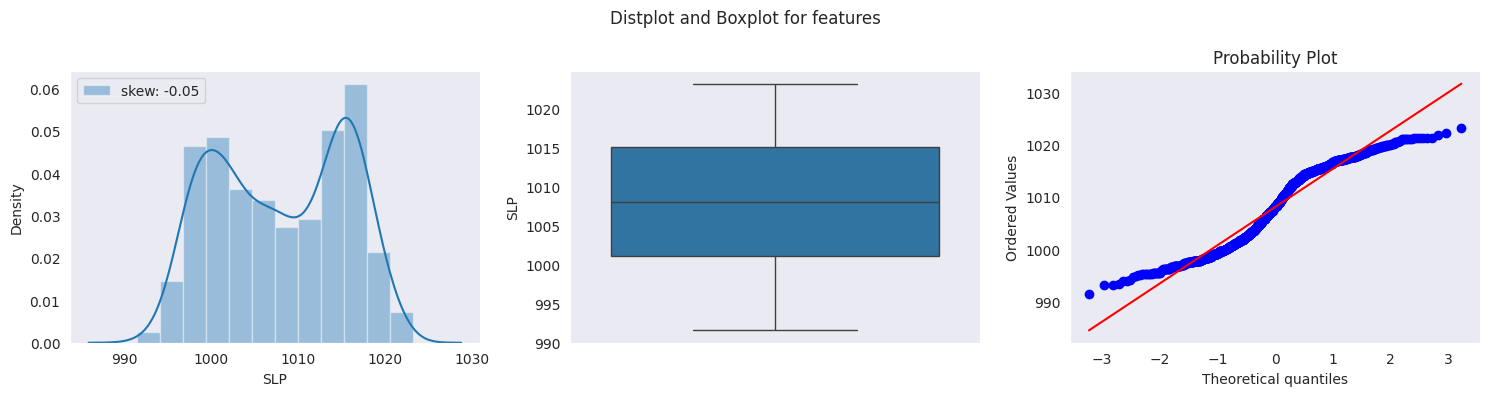

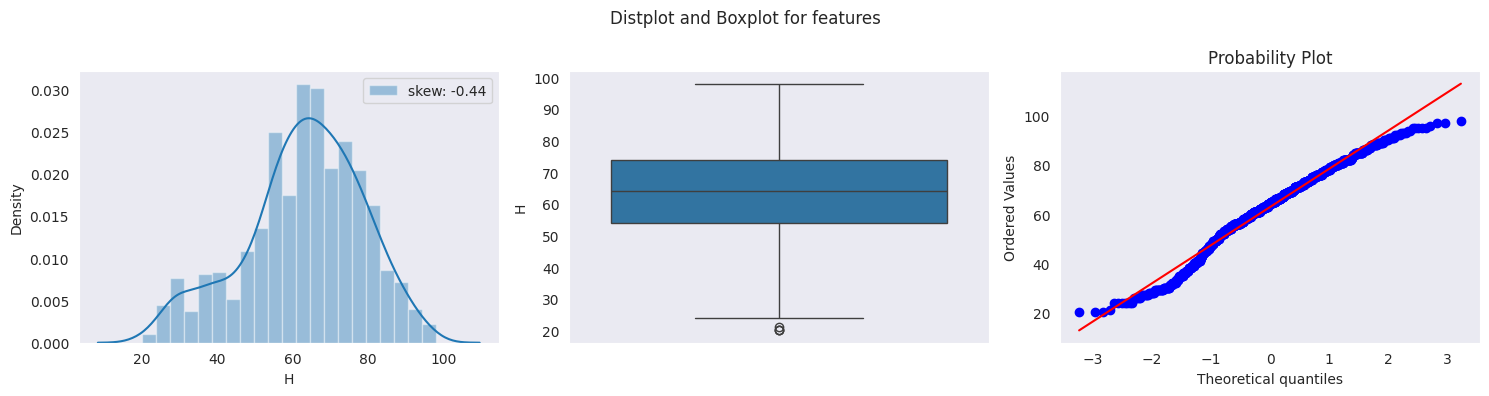

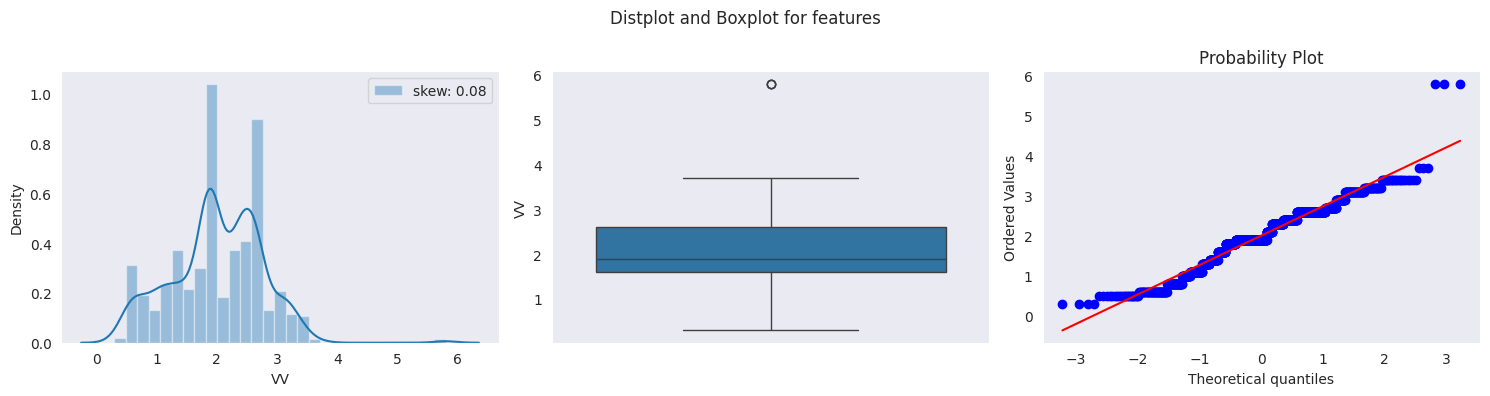

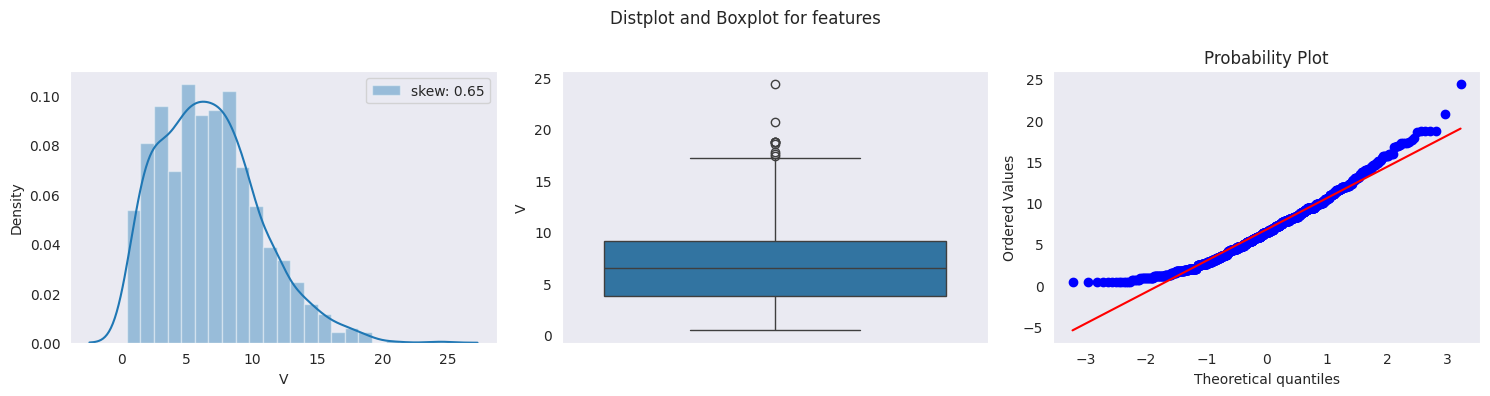

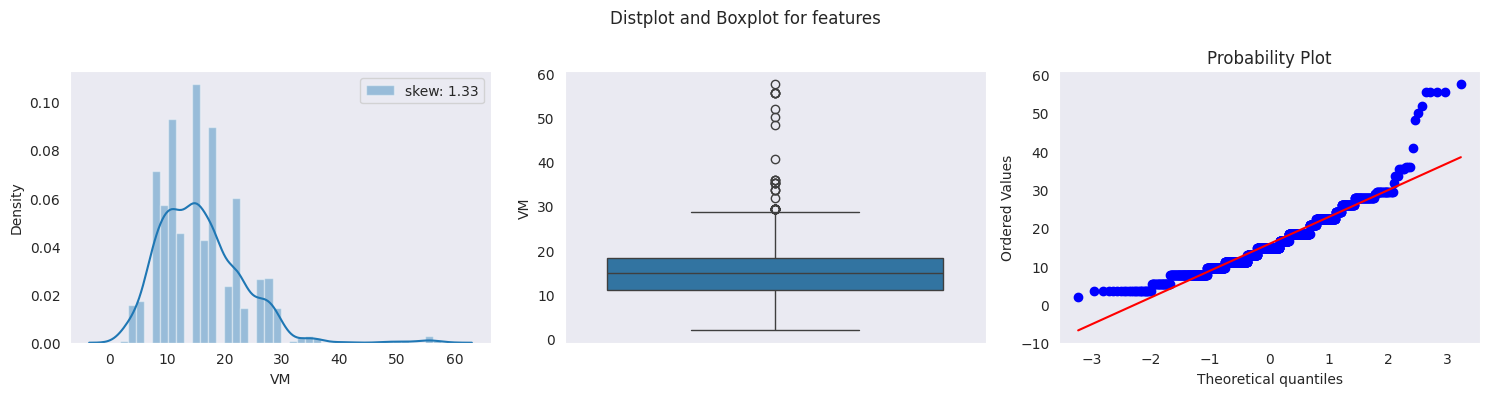

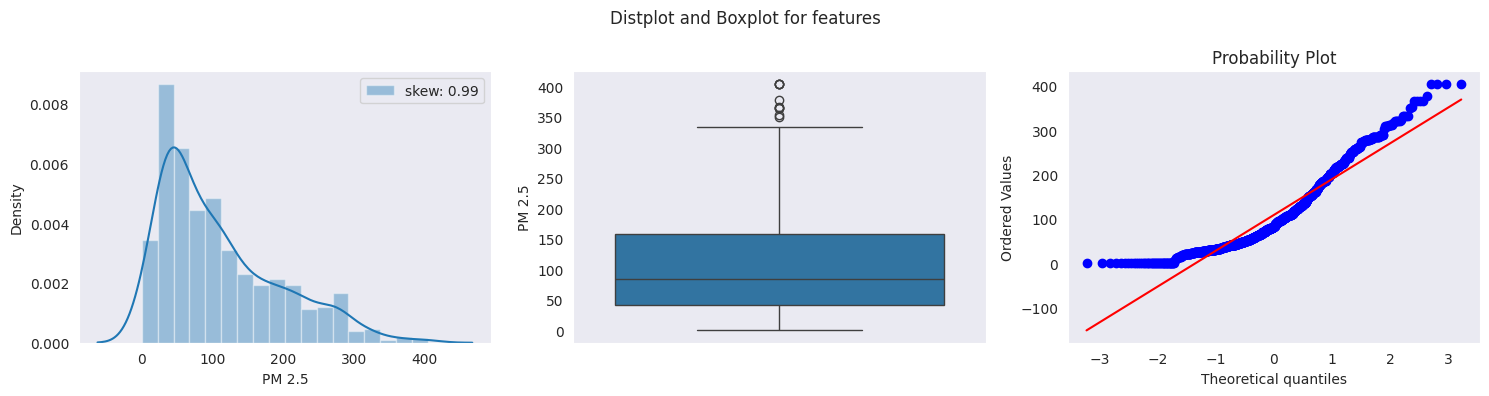

In [ ]:
from scipy import stats
features=df.columns
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.suptitle("Distplot and Boxplot for features")
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [ ]:
new_df=df.copy()

In [ ]:
def percentile_capping(df, cols, from_low_end, from_high_end):

    for col in cols:
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [ ]:
percentile_capping(new_df, features, 0.01, 0.01)

In [ ]:
new_df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,26.034249,32.501099,19.476374,1008.077106,62.891026,1.996795,6.735714,15.676374,108.802484
std,7.190863,6.606756,7.401534,7.490763,15.625956,0.721084,3.785142,6.750778,83.564274
min,10.800000,16.300000,5.200000,995.100000,24.000000,0.500000,0.400000,3.500000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.250000,21.200000,1008.050000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,37.700000,44.000000,30.700000,1021.000000,94.000000,3.400000,17.200000,35.900000,349.291667


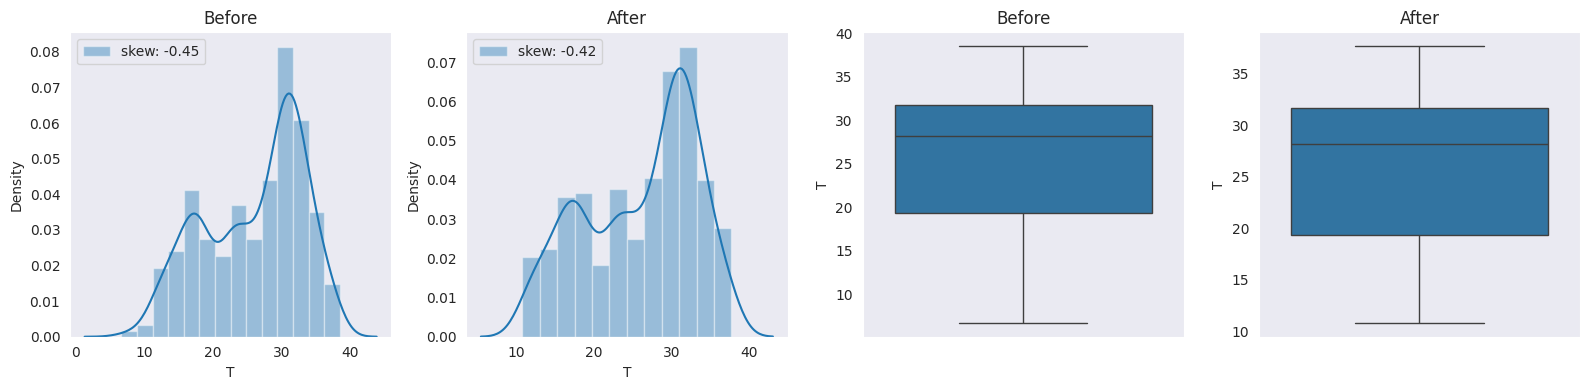

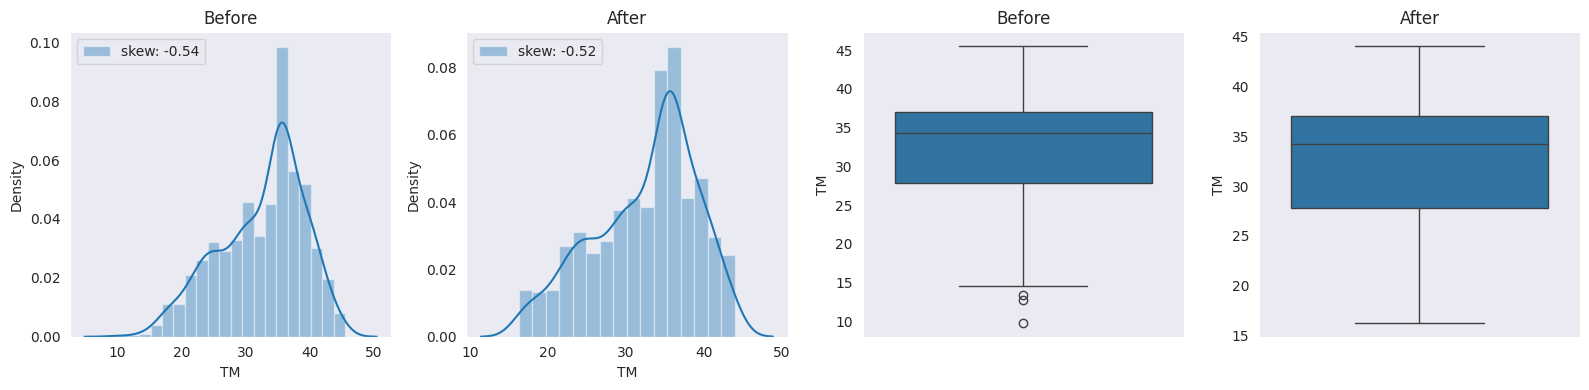

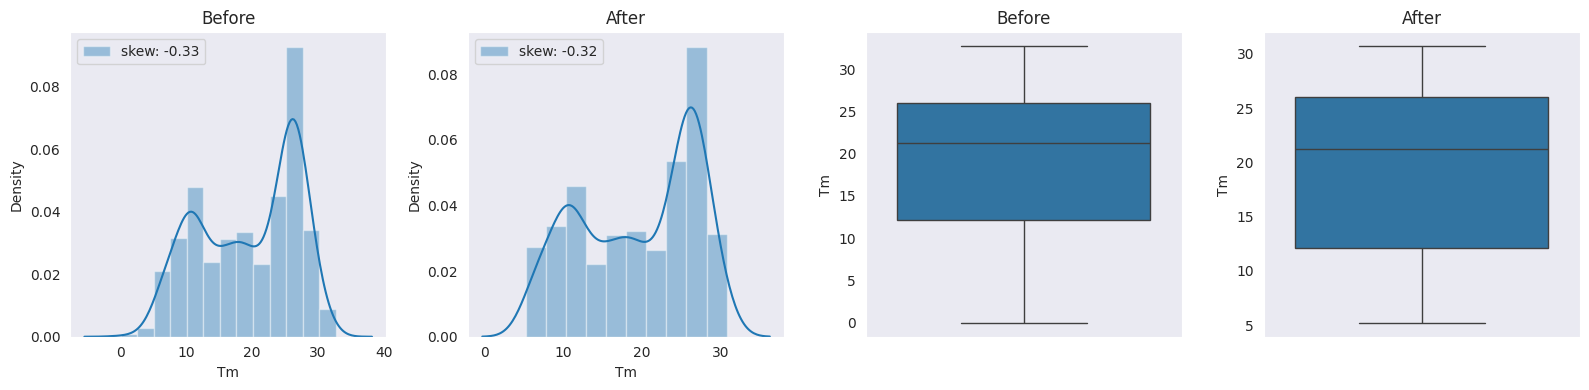

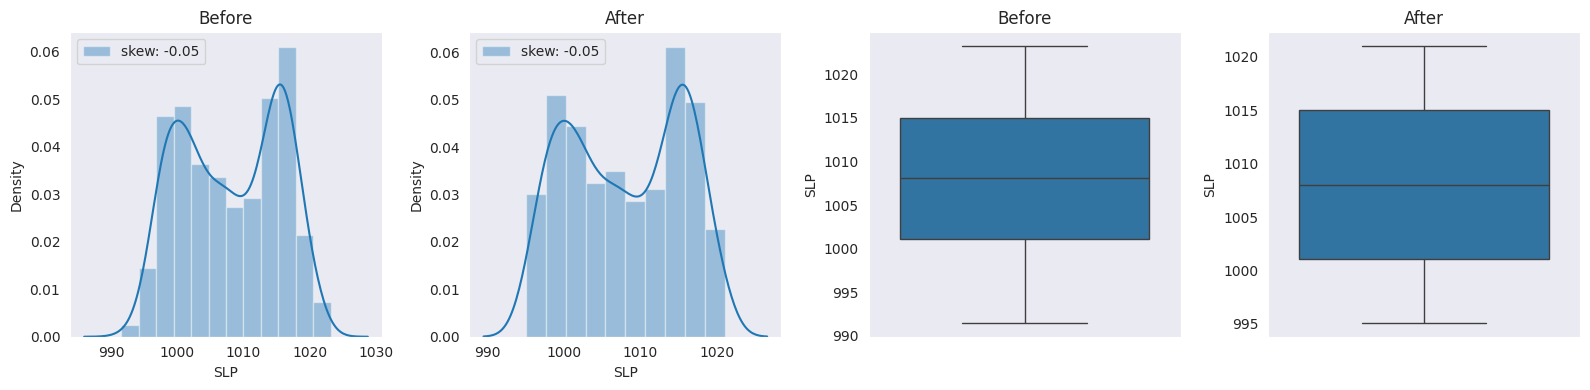

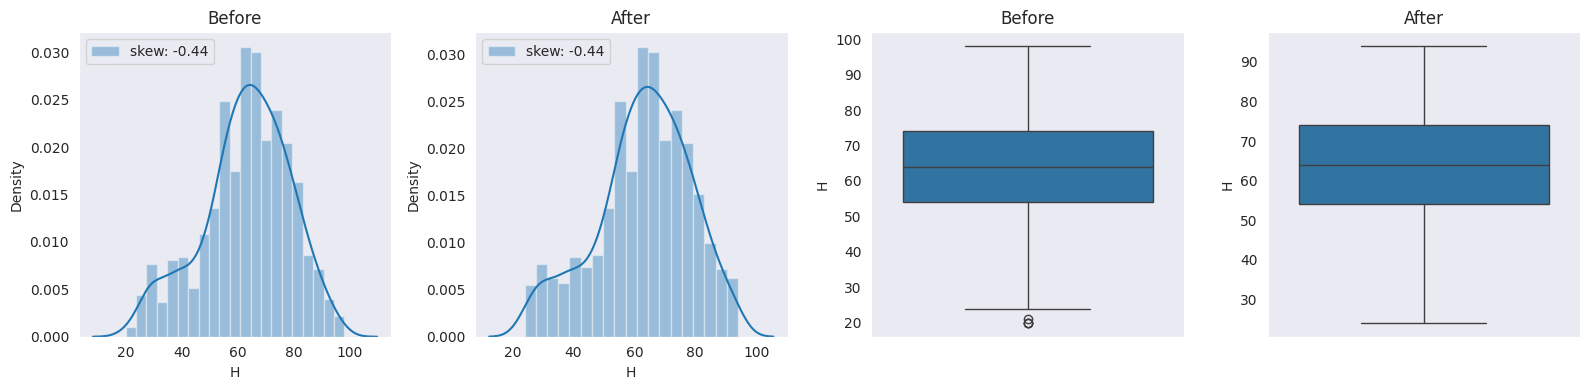

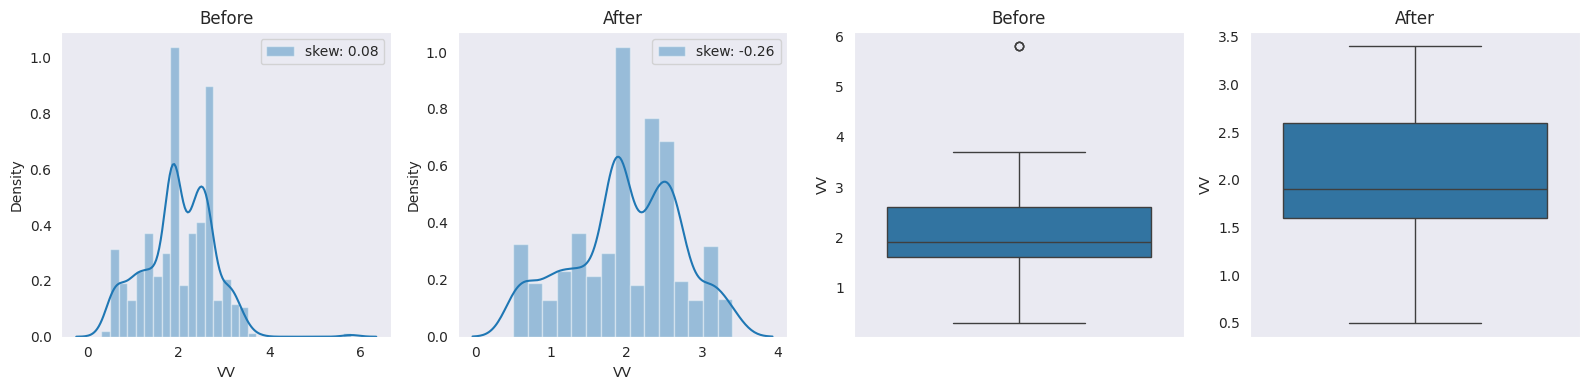

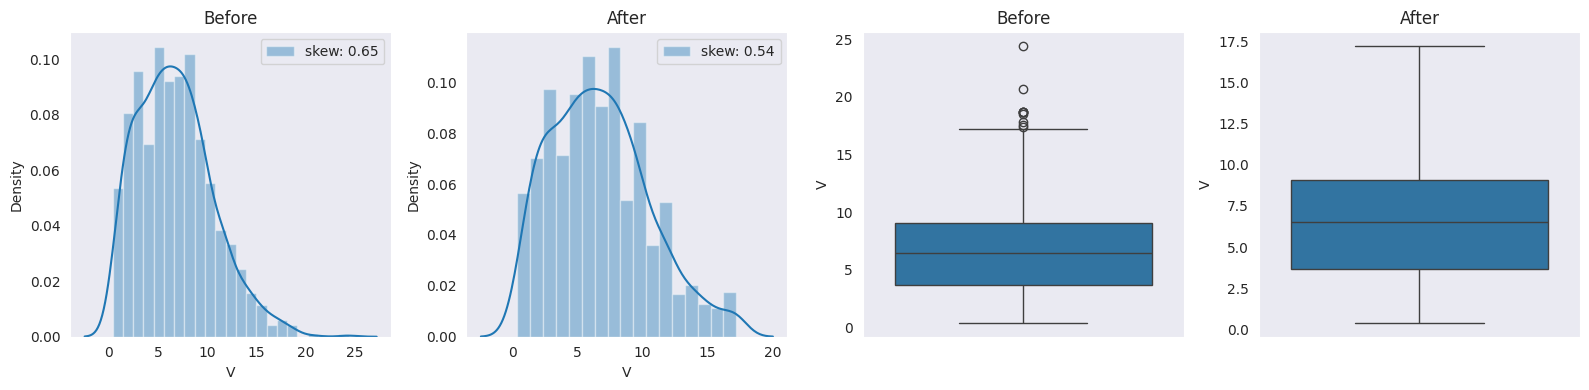

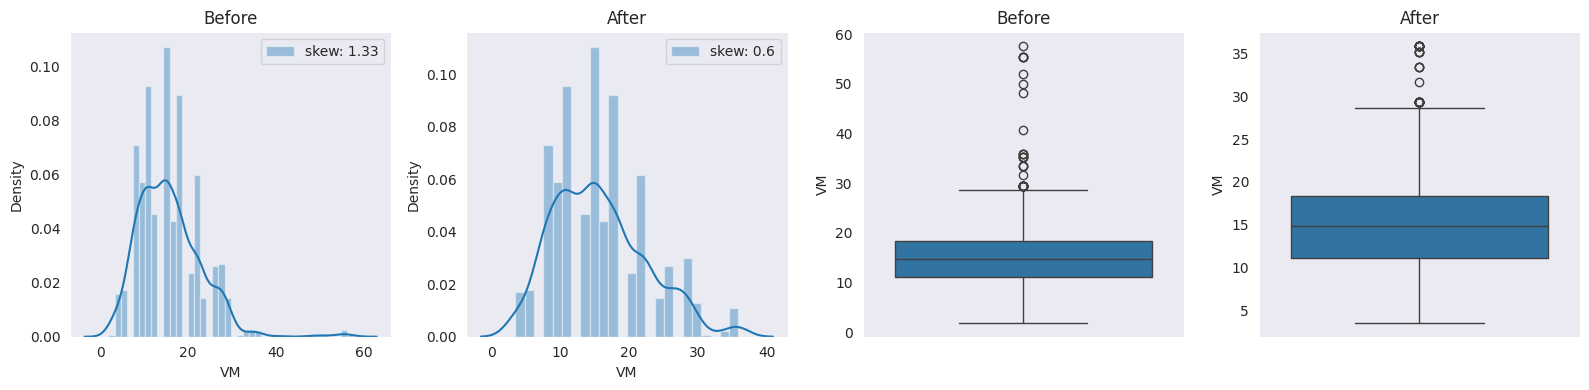

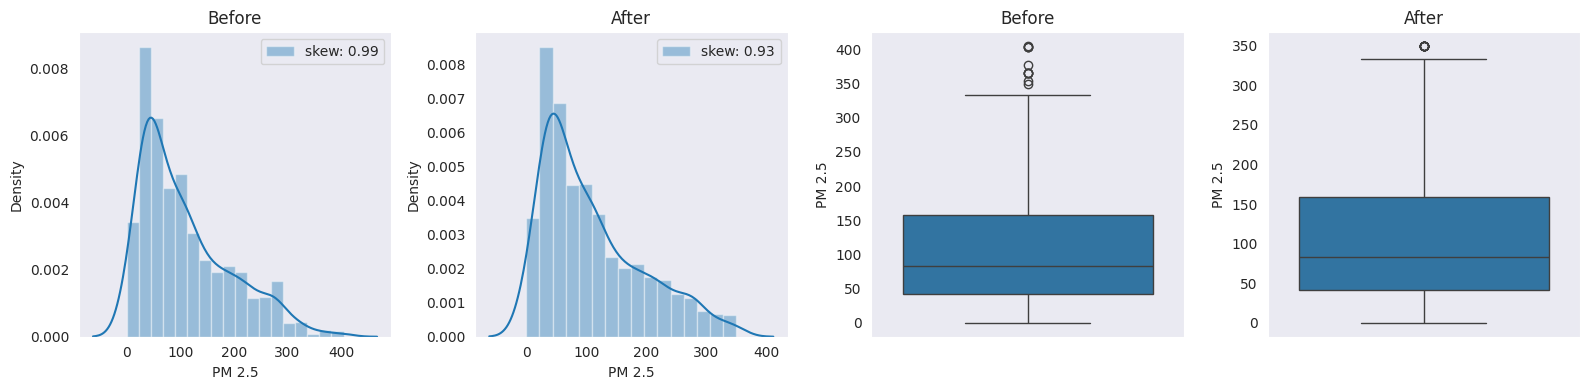

In [ ]:
for col in features:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(new_df[col], label="skew: " + str(np.round(new_df[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(new_df[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [ ]:
df=new_df.copy()


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
model = ExtraTreesRegressor()
model.fit(X,y)
print("Model Important values"+str(model.feature_importances_))

Model Important values[0.17085058 0.08108884 0.20344139 0.1620687  0.08777628 0.19897178
 0.05200981 0.04379261]


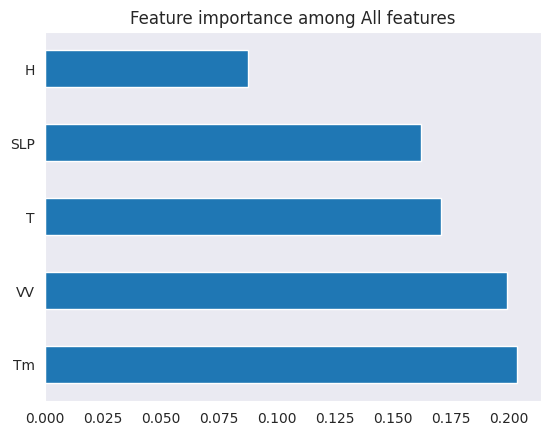

In [ ]:
#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.title("Feature importance among All features")
plt.show()

In [ ]:
import pickle
# open a file, where you want to store the data
file = open('df_cleaned_data.pkl', 'wb')

# dump information to that file
pickle.dump(df, file)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [ ]:

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Regression coeficent of all independent variable"+str(regressor.coef_))

Regression coeficent of all independent variable[ -1.77561496   0.90970293  -4.30303144   0.41423743  -1.11402666
 -43.78140634  -1.88691322   0.58221791]


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5452535222531911
Coefficient of determination R^2 <-- on test set: 0.5439884136067282


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
print(score.mean())

0.48331624723886935


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)
print('Intercept:', regressor.intercept_)

     Coefficient
T      -1.775615
TM      0.909703
Tm     -4.303031
SLP     0.414237
H      -1.114027
VV    -43.781406
V      -1.886913
VM      0.582218
Intercept: -47.763504258801035


In [ ]:
from sklearn import metrics
y_prediction=regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

MAE: 43.60056698772739
MSE: 3358.957312991816
RMSE: 57.9565122569657


In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot
def predicted_residual(actual,predicted):
  fig,ax = plt.subplots(1,2,figsize=(14,6))
  import scipy as sp
  _,(_,_,r)= sp.stats.probplot((actual-predicted),fit=True,plot=ax[0])
  ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

  #Check for Homoscedasticity
  sns.scatterplot(y = (actual-predicted), x= predicted, ax = ax[1],color='r')
  plt.ylabel('Residual')
  plt.xlabel('Predicted')
  ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

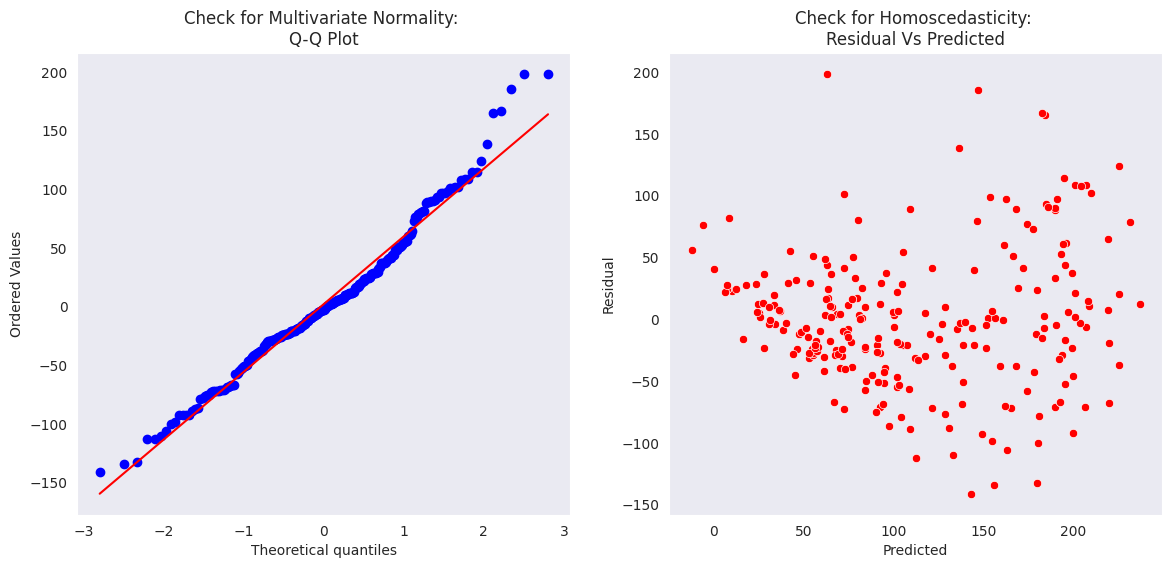

In [ ]:
predicted_residual(y_test,y_prediction)

In [ ]:
import pickle

#save the model
#regressor.save('/content/drive/My Drive/AQI_linear')
# open a file, where you ant to store the data
file = open('AQI_liner_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso=Lasso()
from sklearn.model_selection import RepeatedKFold
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=100)
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=cv)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-3226.4441882710867


In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-2,1e-1,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6]}
from sklearn.model_selection import RepeatedKFold
#parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=100)
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=cv)
lasso_regressor.fit(X,y)
print("Lasso regressor best alpha value is "+str(lasso_regressor.best_params_))
print("Lasso regressor best score value is"+str(lasso_regressor.best_score_))

Lasso regressor best alpha value is {'alpha': 0.1}
Lasso regressor best score value is-3226.1617961001607


In [ ]:
prediction_lasso=lasso_regressor.predict(X_test)

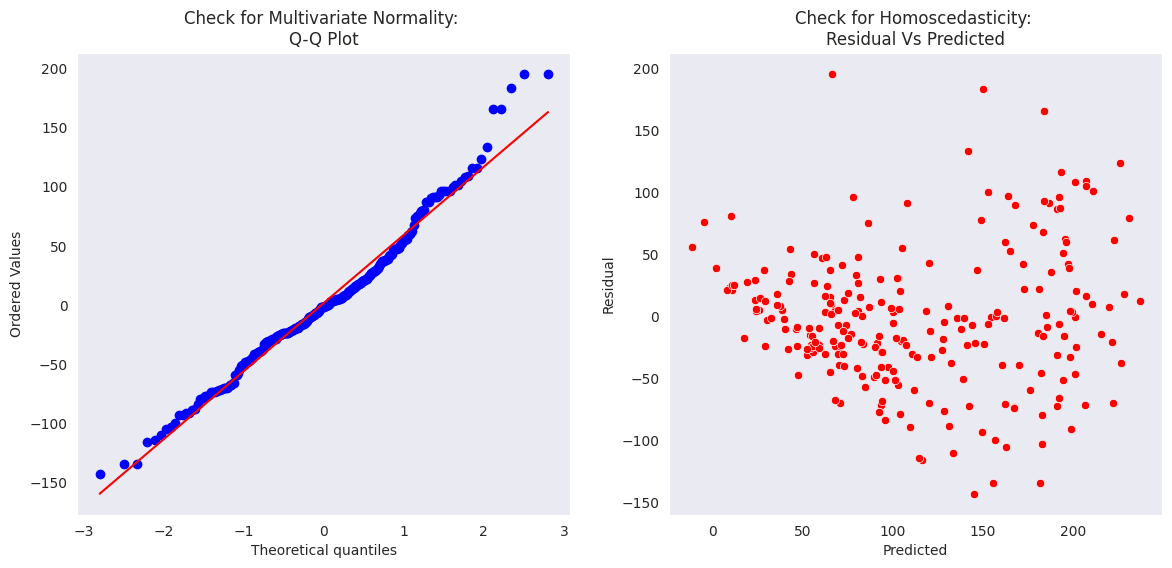

In [ ]:
predicted_residual(y_test,prediction_lasso)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

MAE: 43.505372184708776
MSE: 3335.4147056302118
RMSE: 57.75304931889062


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)

In [ ]:
with open('/content/df_cleaned_data.pkl','rb') as file:
    df= pickle.load(file)

In [ ]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,10.8,16.3,5.2,1017.6,93.0,0.5,4.3,9.4,219.720833
1,10.8,16.3,5.2,1018.5,87.0,0.6,4.4,11.1,182.187500
2,10.8,16.3,5.2,1019.4,82.0,0.6,4.8,11.1,154.037500
3,10.8,16.3,5.2,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,5.2,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,94.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
with open('/content/drive/MyDrive/df_cleaned_data.pkl','rb') as file:
    df= pickle.load(file)

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
import xgboost as xgb
xgb_regressor=xgb.XGBRegressor()
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:

print("Coefficient of determination R^2 <-- on train set: {}".format(xgb_regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(xgb_regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9997363218782986
Coefficient of determination R^2 <-- on train set: 0.8217498524290083


In [ ]:
xgb_prediction=xgb_regressor.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, xgb_prediction))
print('MSE:', metrics.mean_squared_error(y_test, xgb_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction)))

MAE: 20.130584627194857
MSE: 1338.7415870448913
RMSE: 36.588817786926256


In [ ]:
xgb_regressor_rcv1=xgb.XGBRegressor()

In [ ]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [ ]:

# Create the random grid
random_grid_1 = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid_1)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [ ]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations

xgb_rcv1 = RandomizedSearchCV(estimator = xgb_regressor_rcv1, param_distributions = random_grid_1,
                               scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2,
                               random_state=42, n_jobs = 1)


In [ ]:
xgb_rcv1.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=  12.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=  21.2s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s
[CV] END learning_ra

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
xgb_rcv1_prediction=xgb_rcv1.predict(X_test)
print(xgb_rcv1.best_params_)
print(xgb_rcv1.best_score_)
print('MAE:', metrics.mean_absolute_error(y_test,xgb_rcv1_prediction))
print('MSE:', metrics.mean_squared_error(y_test, xgb_rcv1_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_rcv1_prediction)))


{'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': '0.05'}
-1169.0376505851557
MAE: 17.945188095489527
MSE: 1122.755203077836
RMSE: 33.5075394960274


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('xgb_randomcv1.pkl', 'wb')

# dump information to that file
pickle.dump(xgb_rcv1, file)

In [ ]:
print(xgb_rcv1.best_params_)
print(xgb_rcv1.best_score_)

{'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': '0.05'}
-1169.0376505851557
